# Topic 3: Recommendation System
### Demo: Gemsim, Cosin Similarity

In [ ]:
!pip install gensim

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
import warnings
from gensim import corpora, models, similarities
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import pandas as pd
import re

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/MyDrive/LDS0/Khoa_304/Demo_project2'

/content/gdrive/MyDrive/LDS0/Khoa_304/Demo_project2


In [ ]:
data = pd.read_csv("samples_17062025.csv")
# Chú ý: Đây là các công ty có "Company overview" tiếng Anh, khi thực hiện thì phải chuẩn về 1 ngôn ngữ để đề xuất

In [ ]:
data.head()

,id,Company Name,Company Type,Company industry,Company size,Country,Working days,Overtime Policy,Company overview,Our key skills,Why you'll love working here,Location,Href
0,68,Cloud Technology,IT Outsourcing,IT Services and IT Consulting,1-50 employees,Vietnam,Monday - Friday,No OT,Cloud Technology VN\nWe’re a group of entrepre...,Skills We Use frequently\nJava\nNodeJS\nReactJ...,Friendly-Relaxed environment\nBe a part of fas...,"{'Ho Chi Minh': ['341-343, Dien Bien Phu - Dmc...",https://itviec.com/companies/cloud-technology\n
1,12,Alpaca Vietnam,IT Product,Software Products and Web Services,51-150 employees,Vietnam,Monday - Friday,No OT,IT Experts in Insurance Domain\nAlpaca Vietnam...,Our main tech stack\nReactJS\nJava\n.NET\nTest...,Attractive salary package\nSecond home with cl...,"{'Ha Noi': ['23/28 Nguyen Hong, Lang Ha, Dong ...",https://itviec.com/companies/alpaca-vietnam\n
2,325,OMNIA SYSTEMS COMPANY LIMITED,IT Product,IT Services and IT Consulting,1-50 employees,Sweden,Monday - Friday,No OT,"Omnia Systems Vietnam, the top-ranked digital ...",.NET\nJavaScript\nASP.NET\nReact Native\nC#\nT...,Attractive salary and benefits\nFlexible Worki...,"{'Ho Chi Minh': ['5th floor, 186 Dien Bien Phu...",https://itviec.com/companies/omnia-systems-com...
3,230,Innotech Vietnam Corporation,IT Outsourcing,Software Development Outsourcing,51-150 employees,United States,Monday - Friday,No OT,The top Fintech software outsourcing company f...,"Java, Mobile\nSoftware Architect\nQA QC\nJava\...",Highly competitive Salary & Benefits\nBest per...,{'Others': ['2042 Nichole Woods Drive Houston ...,https://itviec.com/companies/innotech-vietnam-...
4,113,Công ty TNHH Icetea Software,IT Outsourcing,Software Development Outsourcing,51-150 employees,Vietnam,Monday - Friday,No OT,Icetea Software\nIcetea Software is an innovat...,NaN,NaN,"{'Ha Noi': ['37 Lê Văn Lương, tòa HUD, Thanh X...",https://itviec.com/companies/cong-ty-tnhh-icet...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id                            20 non-null     int64 
 1   Company Name                  20 non-null     object
 2   Company Type                  20 non-null     object
 3   Company industry              19 non-null     object
 4   Company size                  20 non-null     object
 5   Country                       20 non-null     object
 6   Working days                  20 non-null     object
 7   Overtime Policy               20 non-null     object
 8   Company overview              20 non-null     object
 9   Our key skills                16 non-null     object
 10  Why you'll love working here  16 non-null     object
 11  Location                      20 non-null     object
 12  Href                          20 non-null     object
dtypes: int64(1), object(12

In [ ]:
df = data[["Company overview"]]

In [ ]:
df.head()

,Company overview
0,Cloud Technology VN\nWe’re a group of entrepre...
1,IT Experts in Insurance Domain\nAlpaca Vietnam...
2,"Omnia Systems Vietnam, the top-ranked digital ..."
3,The top Fintech software outsourcing company f...
4,Icetea Software\nIcetea Software is an innovat...


In [ ]:
# rename columns "Company overview" to "Company_overview"
# df.rename(columns={"Company overview": "Company_overview"}, inplace=True)

In [ ]:
# Hàm loại bỏ stopwords dùng thư viện cho tiếng Anh
def remove_stopwords_sklearn(text):
    if pd.isna(text):
        return ""
    words = re.findall(r'\b\w+\b', text.lower())
    tokens = [word for word in words if word not in ENGLISH_STOP_WORDS]
    return ' '.join(tokens)

# Tạo cột mới
df['Company_overview'] = df['Company overview'].apply(remove_stopwords_sklearn)

<ipython-input-11-2277355634>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Company_overview'] = df['Company overview'].apply(remove_stopwords_sklearn)


In [ ]:
df['Company_overview']

,Company_overview
0,cloud technology vn group entrepreneurs usa fr...
1,experts insurance domain alpaca vietnam establ...
2,omnia systems vietnam ranked digital workplace...
3,fintech software outsourcing company focusing ...
4,icetea software icetea software innovative out...
5,blue belt technology looking levels metaverse ...
6,vietcap securities joint stock company vietcap...
7,1 fintech company parent company money forward...
8,vcaptech value computing software high tech ap...
9,build fintech mobile apps webs services teqnol...


# Gemsim
- https://pypi.org/project/gensim/
-Là một thư viện Python chuyên xác định sự tương tự về ngữ nghĩa giữa hai tài liệu thông qua mô hình không gian vector và bộ công cụ mô hình hóa chủ đề.
- Có thể xử lý kho dữ liệu văn bản lớn với sự trợ giúp của việc truyền dữ liệu hiệu quả và các thuật toán tăng cường
- Tốc độ xử lý và tối ưu hóa việc sử dụng bộ nhớ tốt
- Tuy nhiên, Gensim có ít tùy chọn tùy biến cho các function
#### Tham khảo:
- link https://www.tutorialspoint.com/gensim/index.htm
- link https://www.machinelearningplus.com/nlp/gensim-tutorial/

In [ ]:
# Tokenize(split) the sentences into words
df_gem = [[text for text in x.split()] for x in df.Company_overview]

In [ ]:
len(df_gem)

20

In [ ]:
df_gem[:1]

[['cloud',
  'technology',
  'vn',
  'group',
  'entrepreneurs',
  'usa',
  'france',
  'vietnam',
  'engineers',
  'groundbreaking',
  'idea',
  'hope',
  'contribute',
  'better',
  'tomorrow',
  'provide',
  'smart',
  'solutions',
  'companies',
  'sizes',
  'pride',
  'unparalleled',
  'dedicated',
  'service',
  'partner',
  'silicon',
  'valley',
  'https',
  'www',
  'cloudkinetix',
  'com',
  'right',
  'understanding',
  'technological',
  'edge',
  'lead',
  'companies',
  'successful',
  'future',
  'seek',
  'valuable',
  'feedback',
  'clients',
  'order',
  'learn',
  'evolve',
  'cloud',
  'technology',
  'vn',
  'comprehensive',
  'technological',
  'solutions',
  'help',
  'industry',
  'leading',
  'companies',
  'individuals',
  'achieve',
  'greater',
  'success',
  'platform',
  'wide',
  'range',
  'features',
  'created',
  'aim',
  'help',
  'live',
  'differently',
  'order',
  'empower',
  'users',
  'better',
  'cloud',
  'technology',
  'continually',
  'bu

In [ ]:
import re

In [ ]:
# remove some special elements in texts
df_gem_re = [[re.sub('[0-9]+','', e) for e in text] for text in df_gem] # số
df_gem_re = [[t.lower() for t in text if not t in ['', ' ', ',', '.', '...', '-',':', ';', '?', '%', '(', ')', '+', '/', 'g', 'ml']] for text in  df_gem_re] # ký tự đặc biệt

In [ ]:
df_gem_re[:1]

[['cloud',
  'technology',
  'vn',
  'group',
  'entrepreneurs',
  'usa',
  'france',
  'vietnam',
  'engineers',
  'groundbreaking',
  'idea',
  'hope',
  'contribute',
  'better',
  'tomorrow',
  'provide',
  'smart',
  'solutions',
  'companies',
  'sizes',
  'pride',
  'unparalleled',
  'dedicated',
  'service',
  'partner',
  'silicon',
  'valley',
  'https',
  'www',
  'cloudkinetix',
  'com',
  'right',
  'understanding',
  'technological',
  'edge',
  'lead',
  'companies',
  'successful',
  'future',
  'seek',
  'valuable',
  'feedback',
  'clients',
  'order',
  'learn',
  'evolve',
  'cloud',
  'technology',
  'vn',
  'comprehensive',
  'technological',
  'solutions',
  'help',
  'industry',
  'leading',
  'companies',
  'individuals',
  'achieve',
  'greater',
  'success',
  'platform',
  'wide',
  'range',
  'features',
  'created',
  'aim',
  'help',
  'live',
  'differently',
  'order',
  'empower',
  'users',
  'better',
  'cloud',
  'technology',
  'continually',
  'bu

In [ ]:
# Tạo bộ stop words hoặc có thể dùng thư viện bất kỳ (làm thêm nếu cần)
stop_words = [
  # Articles
  "a", "an", "the",
  # Prepositions
  "in", "on", "at", "to", "from", "by", "of", "with",
  # Conjunctions
  "and", "but", "or", "for", "nor", "so", "yet",
  # Pronouns
  "I", "you", "he", "she", "it", "we", "they", "me", "him", "her", "us", "them", "we’re",
  # Auxiliary verbs
  "be", "have", "do", "does", "did", "was", "were", "will", "would", "shall", "should", "may", "might", "can", "could", "must",
  # Other common stop words
  "that", "this", "which", "what", "their", "these", "those", 'https',  'www'
]

# Xử lý từng phần tử trong danh sách
def remove_stopwords(data_list):
  new_data_list = []
  for sentence in data_list:
    new_sentence = [word for word in sentence if word not in stop_words]
    new_data_list.append(new_sentence)
  return new_data_list

# Áp dụng hàm remove_stopwords
df_gem_re = remove_stopwords(df_gem_re)

# In kết quả
print(df_gem_re)

[['cloud', 'technology', 'vn', 'group', 'entrepreneurs', 'usa', 'france', 'vietnam', 'engineers', 'groundbreaking', 'idea', 'hope', 'contribute', 'better', 'tomorrow', 'provide', 'smart', 'solutions', 'companies', 'sizes', 'pride', 'unparalleled', 'dedicated', 'service', 'partner', 'silicon', 'valley', 'https', 'www', 'cloudkinetix', 'com', 'right', 'understanding', 'technological', 'edge', 'lead', 'companies', 'successful', 'future', 'seek', 'valuable', 'feedback', 'clients', 'order', 'learn', 'evolve', 'cloud', 'technology', 'vn', 'comprehensive', 'technological', 'solutions', 'help', 'industry', 'leading', 'companies', 'individuals', 'achieve', 'greater', 'success', 'platform', 'wide', 'range', 'features', 'created', 'aim', 'help', 'live', 'differently', 'order', 'empower', 'users', 'better', 'cloud', 'technology', 'continually', 'building', 'technology', 'stay', 'touch', 'learn', 'upgrades', 'changes'], ['experts', 'insurance', 'domain', 'alpaca', 'vietnam', 'established', 'vision'

In [ ]:
# Obtain the number of features based on dictionary: Use corpora.Dictionary
dictionary = corpora.Dictionary(df_gem_re)

In [ ]:
# List of features in dictionary
dictionary.token2id

{'achieve': 0,
 'aim': 1,
 'better': 2,
 'building': 3,
 'changes': 4,
 'clients': 5,
 'cloud': 6,
 'cloudkinetix': 7,
 'com': 8,
 'companies': 9,
 'comprehensive': 10,
 'continually': 11,
 'contribute': 12,
 'created': 13,
 'dedicated': 14,
 'differently': 15,
 'edge': 16,
 'empower': 17,
 'engineers': 18,
 'entrepreneurs': 19,
 'evolve': 20,
 'features': 21,
 'feedback': 22,
 'france': 23,
 'future': 24,
 'greater': 25,
 'groundbreaking': 26,
 'group': 27,
 'help': 28,
 'hope': 29,
 'https': 30,
 'idea': 31,
 'individuals': 32,
 'industry': 33,
 'lead': 34,
 'leading': 35,
 'learn': 36,
 'live': 37,
 'order': 38,
 'partner': 39,
 'platform': 40,
 'pride': 41,
 'provide': 42,
 'range': 43,
 'right': 44,
 'seek': 45,
 'service': 46,
 'silicon': 47,
 'sizes': 48,
 'smart': 49,
 'solutions': 50,
 'stay': 51,
 'success': 52,
 'successful': 53,
 'technological': 54,
 'technology': 55,
 'tomorrow': 56,
 'touch': 57,
 'understanding': 58,
 'unparalleled': 59,
 'upgrades': 60,
 'usa': 61,
 'u

In [ ]:
# Numbers of features (word) in dictionary
feature_cnt = len(dictionary.token2id)

In [ ]:
feature_cnt

766

In [ ]:
# Obtain corpus based on dictionary (dense matrix)
corpus = [dictionary.doc2bow(text) for text in df_gem_re]

In [ ]:
corpus[3] # id, so lan xuat hien cua token trong van ban/ san pham

[(5, 2),
 (9, 1),
 (42, 1),
 (43, 1),
 (46, 1),
 (65, 7),
 (67, 1),
 (81, 1),
 (109, 3),
 (114, 1),
 (119, 1),
 (155, 1),
 (156, 1),
 (157, 1),
 (158, 1),
 (159, 1),
 (160, 1),
 (161, 1),
 (162, 1),
 (163, 1),
 (164, 1),
 (165, 1),
 (166, 1),
 (167, 1),
 (168, 1),
 (169, 1),
 (170, 1),
 (171, 3),
 (172, 2),
 (173, 3),
 (174, 1),
 (175, 3),
 (176, 1),
 (177, 1),
 (178, 1),
 (179, 1),
 (180, 1),
 (181, 2),
 (182, 1),
 (183, 1),
 (184, 1),
 (185, 1),
 (186, 1),
 (187, 1),
 (188, 2),
 (189, 1),
 (190, 1),
 (191, 4),
 (192, 1),
 (193, 6),
 (194, 1),
 (195, 1),
 (196, 1),
 (197, 1),
 (198, 1),
 (199, 1)]

In [ ]:
# Use TF-IDF Model to process corpus, obtaining index
tfidf = models.TfidfModel(corpus)
# tính toán sự tương tự trong ma trận thưa thớt
index = similarities.SparseMatrixSimilarity(tfidf[corpus],
                                            num_features = feature_cnt)
# ma tran: n x n
# khi đã có matrix tương tự giải quyết được
# bài toán: khi người ta chọn 1 công ty trong danh sách -> id công ty
# lấy id này -> tra trong ma trận -> tìm 3~5 công ty có sim cao nhất

# bài toán 2: search -> chuyển nd search -> đúng định dạng tra -> tìm sim của search với các công ty đang có
# -> tìm 3 ~ 5 khóa có sim cao nhất

In [ ]:
# When user choose one product
# Giả sử là chọn sản phẩm đầu tiên để xem, index=0
cp_selection = df.head(1)

In [ ]:
cp_selection

,Company overview,Company_overview
0,Cloud Technology VN\nWe’re a group of entrepre...,cloud technology vn group entrepreneurs usa fr...


In [ ]:
# sản phẩm đang xem
name_description_pre = cp_selection.Company_overview.to_string(index=False)

In [ ]:
name_description_pre

'cloud technology vn group entrepreneurs usa fra...'

In [ ]:
# can phai goi function chuan hoa da ap dung cho cac san pham
view_cp = name_description_pre.lower().split()

In [ ]:
# Convert search words into Sparse Vectors
kw_vector = dictionary.doc2bow(view_cp)

In [ ]:
kw_vector

[(6, 1), (19, 1), (27, 1), (55, 1), (61, 1), (66, 1)]

In [ ]:
# similarity calculation
sim = index[tfidf[kw_vector]]

In [ ]:
# print result
for i in range(len(sim)):
    # Vì lấy mẫu đầu tiên để xem nên bỏ qua mẫu đầu tiên
    if i!=0:
        print('keyword is similar to doc_index %d: %.2f' % (i, sim[i]))

keyword is similar to doc_index 1: 0.00
keyword is similar to doc_index 2: 0.01
keyword is similar to doc_index 3: 0.00
keyword is similar to doc_index 4: 0.00
keyword is similar to doc_index 5: 0.04
keyword is similar to doc_index 6: 0.00
keyword is similar to doc_index 7: 0.02
keyword is similar to doc_index 8: 0.03
keyword is similar to doc_index 9: 0.00
keyword is similar to doc_index 10: 0.03
keyword is similar to doc_index 11: 0.00
keyword is similar to doc_index 12: 0.00
keyword is similar to doc_index 13: 0.05
keyword is similar to doc_index 14: 0.01
keyword is similar to doc_index 15: 0.00
keyword is similar to doc_index 16: 0.00
keyword is similar to doc_index 17: 0.00
keyword is similar to doc_index 18: 0.00
keyword is similar to doc_index 19: 0.00


In [ ]:
# Giả sử sản phẩm liên quan nhất có index là 1 như trên
cp_famillier = df.iloc[[13]]

In [ ]:
cp_famillier

,Company overview,Company_overview
13,Build Technologies and Grow People. From Vietn...,build technologies grow people vietnam world v...


In [ ]:
# hoặc có thể thực hiện như sau
data = []
for i in range(len(sim)):
    data.append((i, sim[i]))

In [ ]:
sorted_data = sorted(data, key=lambda x: x[1], reverse=True)

In [ ]:
sorted_data

[(0, 0.36855635),
 (13, 0.04771587),
 (5, 0.03940097),
 (8, 0.034348033),
 (10, 0.031018652),
 (7, 0.022663428),
 (14, 0.011903233),
 (2, 0.0117320055),
 (1, 0.0),
 (3, 0.0),
 (4, 0.0),
 (6, 0.0),
 (9, 0.0),
 (11, 0.0),
 (12, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0)]

# Cosine_similarity
- link https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html
- link https://en.wikipedia.org/wiki/Cosine_similarity
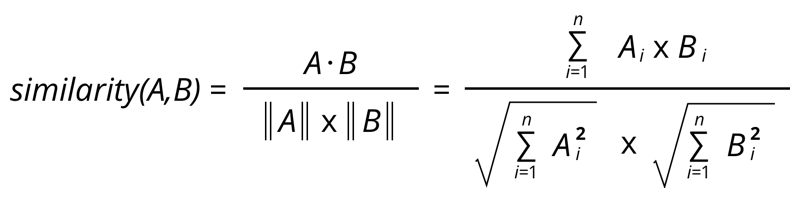

In [ ]:
from numpy import dot
from numpy.linalg import norm
X = [1,2]
Y = [2,2]
cos_sim = dot(X,Y) / (norm(X)*norm(Y))
print(cos_sim)

0.9486832980505138


In [ ]:
tf = TfidfVectorizer(analyzer='word', min_df=0.0, stop_words=stop_words)

In [ ]:
tfidf_matrix = tf.fit_transform(df.Company_overview) #
# khi dua cong ty moi vao
# tfidf_moi = tf.fit_transform(cong_ty_moi_wt) # 1 ct
# tfidf_gop = tfidf_matrix add them tfidf_moi
# 200001 cty

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['re'] not in stop_words.
  warnings.warn(


In [ ]:
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)
# matran n x n

In [ ]:
cosine_similarities

array([[1.        , 0.0392887 , 0.08059644, 0.05872246, 0.04121071,
        0.1193733 , 0.04688167, 0.0638333 , 0.07902239, 0.        ,
        0.02490987, 0.07328224, 0.05296699, 0.08874482, 0.05925866,
        0.0584447 , 0.0143509 , 0.01972261, 0.        , 0.03556096],
       [0.0392887 , 1.        , 0.08423505, 0.07469234, 0.07920663,
        0.04490767, 0.0789647 , 0.03219135, 0.09108832, 0.01339043,
        0.0358803 , 0.05234643, 0.07019104, 0.12377755, 0.        ,
        0.05342641, 0.06237261, 0.0300127 , 0.        , 0.03606325],
       [0.08059644, 0.08423505, 1.        , 0.03952893, 0.0289086 ,
        0.05934336, 0.01129117, 0.0218124 , 0.01798907, 0.02735143,
        0.04861107, 0.06469866, 0.03554682, 0.06291589, 0.04007973,
        0.08337406, 0.0249351 , 0.03328107, 0.        , 0.0765809 ],
       [0.05872246, 0.07469234, 0.03952893, 1.        , 0.19030683,
        0.10626635, 0.0836804 , 0.20509581, 0.15915491, 0.159606  ,
        0.06742176, 0.08570544, 0.1993439 , 0

In [ ]:
df_show = pd.DataFrame(cosine_similarities)
df_show.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.039289,0.080596,0.058722,0.041211,0.119373,0.046882,0.063833,0.079022,0.000000,0.024910,0.073282,0.052967,0.088745,0.059259,0.058445,0.014351,0.019723,0.0,0.035561
1,0.039289,1.000000,0.084235,0.074692,0.079207,0.044908,0.078965,0.032191,0.091088,0.013390,0.035880,0.052346,0.070191,0.123778,0.000000,0.053426,0.062373,0.030013,0.0,0.036063
2,0.080596,0.084235,1.000000,0.039529,0.028909,0.059343,0.011291,0.021812,0.017989,0.027351,0.048611,0.064699,0.035547,0.062916,0.040080,0.083374,0.024935,0.033281,0.0,0.076581
3,0.058722,0.074692,0.039529,1.000000,0.190307,0.106266,0.083680,0.205096,0.159155,0.159606,0.067422,0.085705,0.199344,0.121137,0.040167,0.066412,0.050115,0.018209,0.0,0.021622
4,0.041211,0.079207,0.028909,0.190307,1.000000,0.095176,0.040645,0.016452,0.136409,0.081145,0.036393,0.045185,0.119769,0.074857,0.015446,0.034377,0.010888,0.045303,0.0,0.041102


In [ ]:
df_show.style.applymap(lambda x: "background-color: lightblue" if x>=1.0 else "background-color: green" if x>=0.1 and x<1.0 else "background-color: white")

<ipython-input-47-711874655>:1: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  df_show.style.applymap(lambda x: "background-color: lightblue" if x>=1.0 else "background-color: green" if x>=0.1 and x<1.0 else "background-color: white")


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.039289,0.080596,0.058722,0.041211,0.119373,0.046882,0.063833,0.079022,0.000000,0.024910,0.073282,0.052967,0.088745,0.059259,0.058445,0.014351,0.019723,0.000000,0.035561
1,0.039289,1.000000,0.084235,0.074692,0.079207,0.044908,0.078965,0.032191,0.091088,0.013390,0.035880,0.052346,0.070191,0.123778,0.000000,0.053426,0.062373,0.030013,0.000000,0.036063
2,0.080596,0.084235,1.000000,0.039529,0.028909,0.059343,0.011291,0.021812,0.017989,0.027351,0.048611,0.064699,0.035547,0.062916,0.040080,0.083374,0.024935,0.033281,0.000000,0.076581
3,0.058722,0.074692,0.039529,1.000000,0.190307,0.106266,0.083680,0.205096,0.159155,0.159606,0.067422,0.085705,0.199344,0.121137,0.040167,0.066412,0.050115,0.018209,0.000000,0.021622
4,0.041211,0.079207,0.028909,0.190307,1.000000,0.095176,0.040645,0.016452,0.136409,0.081145,0.036393,0.045185,0.119769,0.074857,0.015446,0.034377,0.010888,0.045303,0.000000,0.041102
5,0.119373,0.044908,0.059343,0.106266,0.095176,1.000000,0.028653,0.094633,0.062169,0.055146,0.025361,0.062207,0.071579,0.111257,0.061644,0.082017,0.010822,0.030424,0.000000,0.049666
6,0.046882,0.078965,0.011291,0.083680,0.040645,0.028653,1.000000,0.103937,0.078656,0.067860,0.037854,0.033877,0.038583,0.087698,0.034142,0.025737,0.048809,0.011331,0.000000,0.017943
7,0.063833,0.032191,0.021812,0.205096,0.016452,0.094633,0.103937,1.000000,0.044922,0.190476,0.058567,0.099845,0.084972,0.071488,0.022123,0.018960,0.026083,0.026552,0.000000,0.062610
8,0.079022,0.091088,0.017989,0.159155,0.136409,0.062169,0.078656,0.044922,1.000000,0.106144,0.038326,0.055874,0.119971,0.084185,0.060205,0.031426,0.048263,0.036039,0.000000,0.022040
9,0.000000,0.013390,0.027351,0.159606,0.081145,0.055146,0.067860,0.190476,0.106144,1.000000,0.059080,0.121191,0.080279,0.062772,0.063497,0.056480,0.037376,0.010317,0.000000,0.033796


In [ ]:
cosine_similarities.shape

(20, 20)

In [ ]:
# với mỗi công ty, lấy 3 công ty tương quan nhất
# function lay x công ty tuong quan nhat
# def find_highest_score(cosine_similarities, nums = 3):
results = {}
for idx, row in df.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[-4:-1]
    similar_items = [(cosine_similarities[idx][i]) for i in similar_indices]
    similar_items = [(cosine_similarities[idx][i], df.index[i]) for i in similar_indices]
    print(similar_items[0:])
    results[idx] = similar_items[0:]

[(0.08059643779276796, 2), (0.08874481724101785, 13), (0.11937329902280605, 5)]
[(0.084235046994484, 2), (0.09108832331837713, 8), (0.1237775536655384, 13)]
[(0.08059643779276796, 0), (0.0833740649739592, 15), (0.084235046994484, 1)]
[(0.1903068290907954, 4), (0.19934389840589212, 12), (0.205095805350706, 7)]
[(0.11976911591572383, 12), (0.13640942615273532, 8), (0.1903068290907954, 3)]
[(0.10626634535870405, 3), (0.1112574237802671, 13), (0.11937329902280605, 0)]
[(0.0836804032461601, 3), (0.08769803611404102, 13), (0.10393733833261863, 7)]
[(0.10393733833261863, 6), (0.19047557727770204, 9), (0.205095805350706, 3)]
[(0.11997145909601015, 12), (0.13640942615273532, 4), (0.15915490953710396, 3)]
[(0.12119136218147648, 11), (0.15960600465454094, 3), (0.19047557727770204, 7)]
[(0.05907954547334936, 9), (0.06742176349041323, 3), (0.09405445632733153, 14)]
[(0.099844754784999, 7), (0.10441432315482113, 14), (0.12119136218147648, 9)]
[(0.11976911591572383, 4), (0.11997145909601015, 8), (0.1

In [ ]:
# nguoi dung chon xem 1 công ty -> lay duoc id  -> do vao ma tran ket qua theo id -> ra duoc cac id cua công ty  lien quan -> show san pham lien qua
results[0]

[(0.08059643779276796, 2), (0.08874481724101785, 13), (0.11937329902280605, 5)]